In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/My Drive/

/gdrive/My Drive


In [ ]:
import zipfile

In [ ]:
!unzip 'archive (2)'.zip

Archive:  archive (2).zip
replace chest_xray/__MACOSX/._chest_xray? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.image as mpimg

In [ ]:
import os

path = "/gdrive/My Drive/chest_xray/train"
classes = os.listdir(path)
print(classes)


['NORMAL', 'PNEUMONIA']


In [ ]:
# function to read and process images

def preprocess_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    img_resized = cv2.resize(img, (48, 48))  # Resize image to 48x48 pixels
    img_flattened = img_resized.flatten()  # Flatten image into 1D arraay

In [ ]:
# Define the directories for the X-ray images
PNEUMONIA_dir = os.path.join(path + '/' + classes[0])
NORMAL_dir = os.path.join(path + '/' + classes[1])

# Create lists of the file names in each directory
pneumonia_names = os.listdir(PNEUMONIA_dir)
normal_names = os.listdir(NORMAL_dir)

print('There are ', len(pneumonia_names),
	'images of pneumonia infected in training dataset')
print('There are ', len(normal_names), 'normal images in training dataset')


There are  1341 images of pneumonia infected in training dataset
There are  3875 normal images in training dataset


## Plot the Pneumonia infected Chest X-ray images

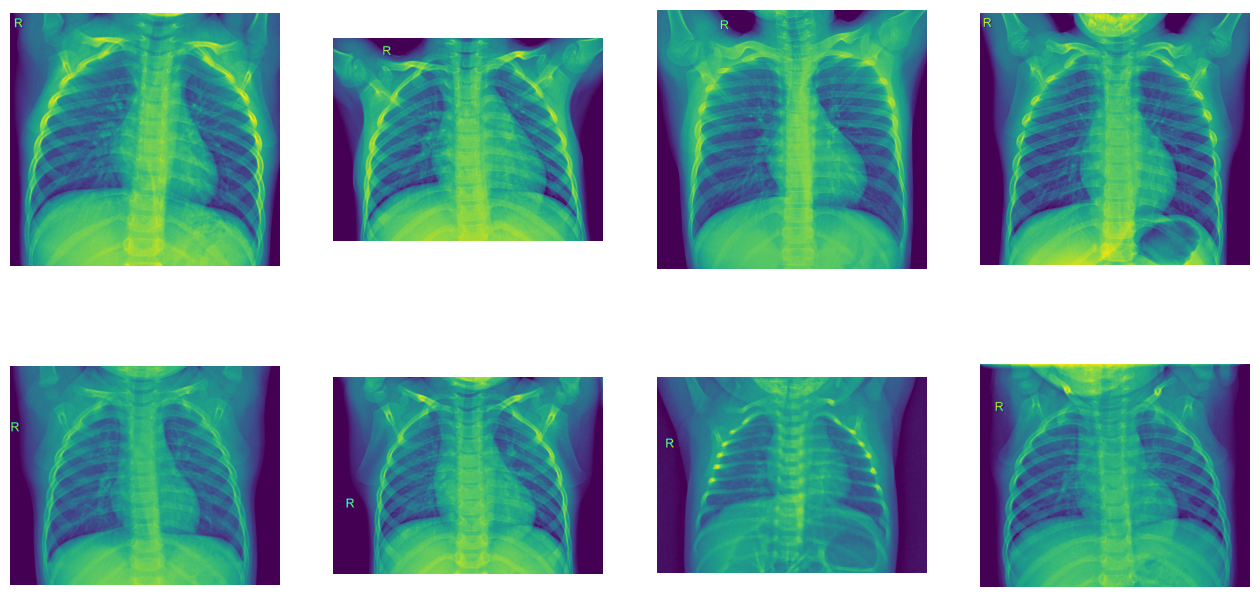

In [ ]:
# Set the figure size
fig = plt.gcf()
fig.set_size_inches(16, 8)

# Select the starting index for the images to display
pic_index = 210

# Create lists of the file paths for the 16 images to display
pneumonia_images = [os.path.join(PNEUMONIA_dir, fname)
					for fname in pneumonia_names[pic_index-8:pic_index]]
# Loop through the image paths and display each image in a subplot
for i, img_path in enumerate(pneumonia_images):
	sp = plt.subplot(2, 4, i+1)
	sp.axis('Off')

	# Read in the image using Matplotlib's imread() function
	img = mpimg.imread(img_path)
	plt.imshow(img)

# Display the plot with the 16 images in a 4x4
plt.show()




## Plot the Normal Chest X-ray images

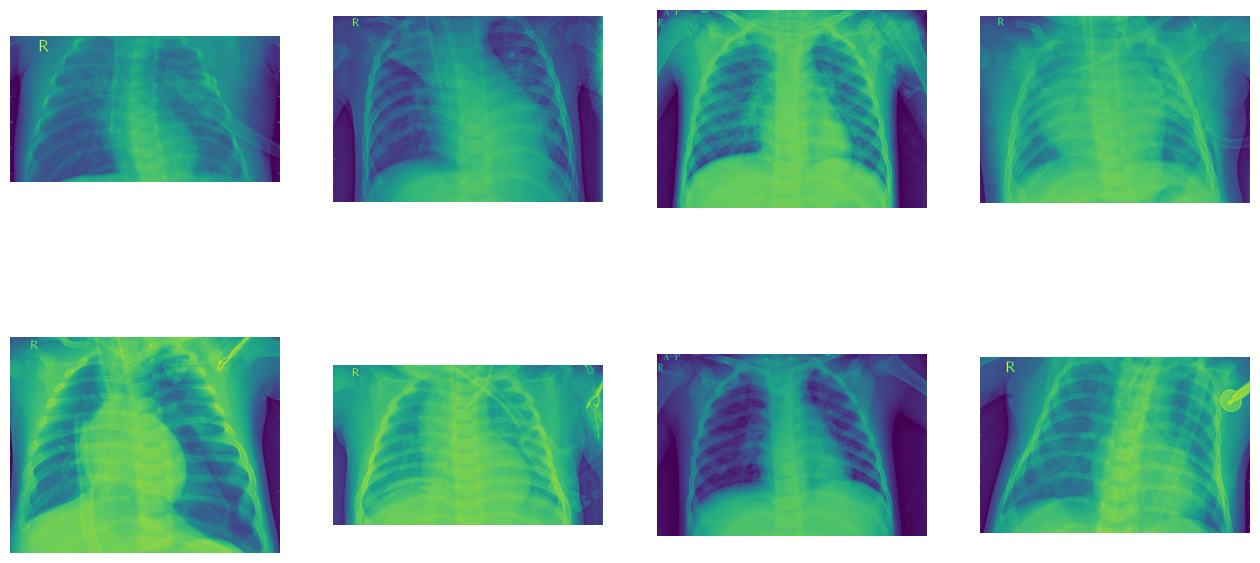

In [ ]:
# Set the figure size
fig = plt.gcf()
fig.set_size_inches(16, 8)

# Select the starting index for the images to display
pic_index = 210

# Create lists of the file paths for the 16 images to display
normal_images = [os.path.join(NORMAL_dir, fname)
			for fname in normal_names[pic_index-8:pic_index]]
# Loop through the image paths and display each image in a subplot
for i, img_path in enumerate(normal_images):
	sp = plt.subplot(2, 4, i+1)
	sp.axis('Off')

	# Read in the image using Matplotlib's imread() function
	img = mpimg.imread(img_path)
	plt.imshow(img)

# Display the plot with the 16 images in a 4x4 grid
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
Train = keras.utils.image_dataset_from_directory(
	directory="/gdrive/My Drive/chest_xray/train",
	labels="inferred",
	label_mode="categorical",
	batch_size=32,
	image_size=(256, 256))
Test = keras.utils.image_dataset_from_directory(
	directory="/gdrive/My Drive/chest_xray/test",
	labels="inferred",
	label_mode="categorical",
	batch_size=32,
	image_size=(256, 256))
Validation = keras.utils.image_dataset_from_directory(
	directory="/gdrive/My Drive/chest_xray/val",
	labels="inferred",
	label_mode="categorical",
	batch_size=32,
	image_size=(256, 256))


Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
  layers.Dropout(0.2),
	layers.Dense(2, activation='sigmoid')
])


In [ ]:
model.compile(
	# specify the loss function to use during training
	loss='binary_crossentropy',
	# specify the optimizer algorithm to use during training
	optimizer='adam',
	# specify the evaluation metrics to use during training
	metrics=['accuracy']
)


In [ ]:
history = model.fit(Train,epochs=10, validation_data=Validation)


Epoch 1/10
163/163 [==============================] - 693s 4s/step - loss: 0.2895 - accuracy: 0.8811 - val_loss: 0.5828 - val_accuracy: 0.6250
Epoch 2/10
163/163 [==============================] - 683s 4s/step - loss: 0.2881 - accuracy: 0.8804 - val_loss: 1.4087 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 676s 4s/step - loss: 0.2745 - accuracy: 0.8867 - val_loss: 3.5853 - val_accuracy: 0.5000
Epoch 4/10
163/163 [==============================] - 686s 4s/step - loss: 0.3031 - accuracy: 0.8775 - val_loss: 3.3730 - val_accuracy: 0.5000
Epoch 5/10
163/163 [==============================] - 710s 4s/step - loss: 0.2290 - accuracy: 0.9135 - val_loss: 1.6335 - val_accuracy: 0.5000
Epoch 6/10
163/163 [==============================] - 768s 5s/step - loss: 0.1651 - accuracy: 0.9429 - val_loss: 2.1927 - val_accuracy: 0.5000
Epoch 7/10
163/163 [==============================] - 765s 5s/step - loss: 0.1565 - accuracy: 0.9456 - val_loss: 2.1928 - val_accuracy: 0.5000

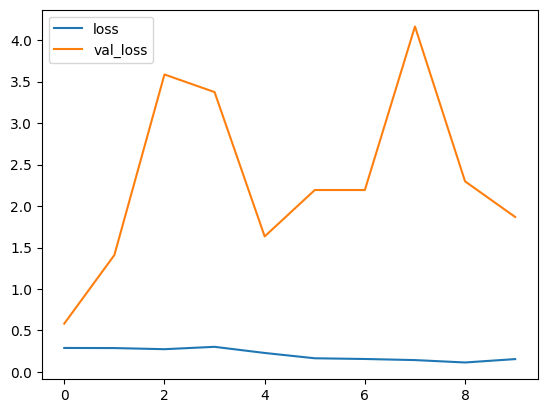

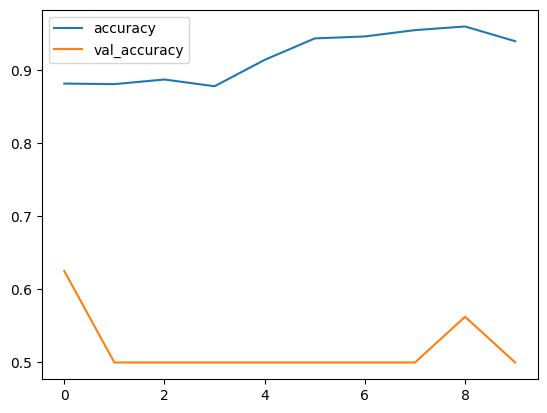

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()


In [ ]:
loss, accuracy = model.evaluate(Test)
print('The accuracy of the model on test dataset is',
	np.round(accuracy*100))


20/20 [==============================] - 29s 1s/step - loss: 1.6685 - accuracy: 0.6378
The accuracy of the model on test dataset is 64.0


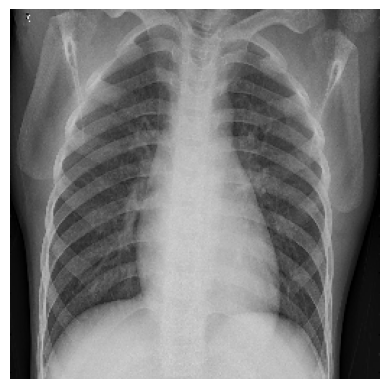

1/1 [==============================] - 0s 52ms/step
Prediction: Pneumonia


In [ ]:


# Define the directory containing the images
directory = "/gdrive/My Drive/chest_xray/test/NORMAL/"

# List all files in the directory
file_list = os.listdir(directory)

# Select a random image file
random_file = random.choice(file_list)

# Load the randomly selected image with the target size of (256, 256)
test_image = tf.keras.utils.load_img(
    os.path.join(directory, random_file),
    target_size=(256, 256))

# Display the loaded image
plt.imshow(test_image)
plt.axis('off')  # Turn off axis
plt.show()

# Convert the loaded image into a NumPy array and
# expand its dimensions to match the expected input shape of the model
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Use the trained model to make a prediction on the input image
result = model.predict(test_image)

# Extract the probability of the input image belonging
# to each class from the prediction result
class_probabilities = result[0]

# Determine the class with the highest probability and print its label
if class_probabilities[0] > class_probabilities[1]:
    print("Prediction: Normal")
else:
    print("Prediction: Pneumonia")


In [ ]:
# Save the model
model.save("pneumonia.h5")
